In [1]:
X = list(range(10))
Y = [1,1,2,4,5,7,8,9,9,10]
print(len(X))
print(len(Y))

10
10


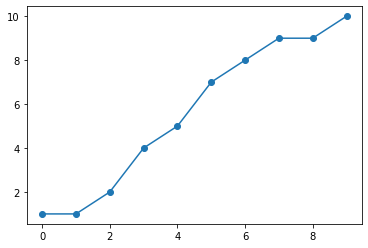

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,Y)    #x,y의 그래프를 그리는 함수
plt.scatter(X,Y) #그래프 말고 점만 나온다.

In [3]:
class H():           #Hypothesis(가설)
    
    def __init__(self, w):      #생성자 w를 입력을 받아 w를 넣어준다. 메서드 맨앞에 파이썬은 self를 넣어야한다.
        self.w = w
        
    def forward(self, x):       #H(x) = w*x 
        return self.w *x
    
    
def cost(h,X,Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])** 2
    error = error / len(X)
    return error
        
h = H(4)
cost(h,X,Y)

222.2

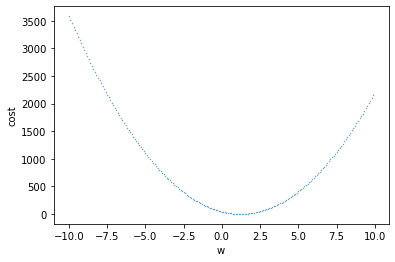

In [4]:
list_w = []
list_c = []
for i in range(-100, 100):
    w = i * 0.1
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)

#plt.figure(figsize=(1,1)) #사이즈 1,1 설정
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1)


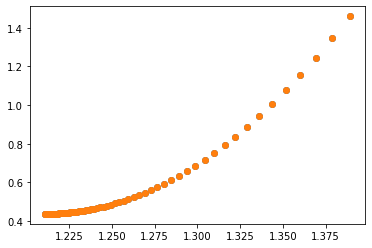

In [15]:
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, X, Y)                 #cost1 w
    eps = 0.00001
    h = H(w+eps)
    cost2 = cost(h, X, Y)                 #cost2 w + epsil
    dcost = cost2-cost1
    dw = eps
    grad = dcost / dw                     #cost2-cost1 / epsil
    return grad, (cost1+cost2)*0.5

def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c

w1 = 1.4
w2 = 1.4

list_w1 = []
list_w2 = []
list_c1 = []
list_c2 = []

lr = 0.001      #코스트에 따라서 러닝메이트를 선정 너무 크면 오버슈팅
for i in range(100):
    grad, mean_cost = cal_grad(w1,  cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)
    
    w1 -= lr * grad      #gradient descent 구함
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    #print(w1, mean_cost, w2, mean_cost2)
    
plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)